### import the neccessary modules 

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math

In [2]:
stdata = pd.read_csv("studentdata.csv")
stdata.head(10)

,First Name,Last Name,City,State,Zip Code,DOB [DD/MM/YYYY],Age,Gender,Email Address,Contact Number,...,Programming Language Known other than Java (one major),Have you worked on MySQL or Oracle database,Have you studied OOP Concepts,Certifications/Achievement/ Research papers,Rate your written communication skills [1-10],Rate your verbal communication skills [1-10],Link to updated Resume (Google/ One Drive link preferred),link to Linkedin profile,How Did You Hear About This Internship?,Label
0,Barron,Harnes,Kolhapur,Maharashtra,416004,24/09/2000,19,Male,bharnes0@harvard.edu,6345186600,...,HTML/CSS,Yes,No,NaN,6,10,NaN,NaN,Twitter,ineligible
1,Velma,Allone,Pune,Maharashtra,411011,23/10/1997,22,Female,vallone1@i2i.jp,2808753102,...,PHP,No,Yes,NaN,10,7,NaN,NaN,Ex/Current Employee,eligible
2,Thibaut,Scotland,Mumbai,Maharashtra,400059,6/2/1996,24,Male,tscotland2@opensource.org,2945231918,...,C,No,No,NaN,8,6,NaN,NaN,Twitter,ineligible
3,Retha,Proud,Solapur,Maharashtra,413224,26/12/1999,20,Female,rproud3@flavors.me,7507196200,...,PHP,No,Yes,NaN,9,6,NaN,NaN,Twitter,ineligible
4,Del,Pearse,Sangli,Maharashtra,416436,21/09/1996,23,Female,dpearse4@sakura.ne.jp,6643884281,...,Python,No,Yes,NaN,8,6,NaN,NaN,Facebook,ineligible
5,Farlay,Anstis,Sangli,Maharashtra,416415,12/2/2000,20,Male,fanstis5@zdnet.com,8429984749,...,PHP,Yes,No,NaN,6,7,NaN,NaN,Twitter,ineligible
6,Vanna,Keighley,Solapur,Maharashtra,413224,18/03/2000,20,Female,vkeighley6@un.org,3929498765,...,PHP,Yes,No,NaN,10,7,NaN,NaN,Facebook,eligible
7,Vikki,Ottawell,Kolhapur,Maharashtra,416004,21/07/1998,21,Female,vottawell7@4shared.com,4906898554,...,C++,No,Yes,NaN,9,9,NaN,NaN,Newspaper,eligible
8,Stanwood,Ferron,Mumbai,Maharashtra,400055,9/12/1999,20,Male,sferron8@vkontakte.ru,8739225175,...,C++,Yes,Yes,NaN,9,10,NaN,NaN,Other,eligible
9,Tommie,Rastall,Kolhapur,Maharashtra,416119,28/10/1997,22,Male,trastall9@canalblog.com,3634744513,...,.Net,No,Yes,NaN,10,10,NaN,NaN,Blog post,ineligible


### The number of students applied to different technologies. 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

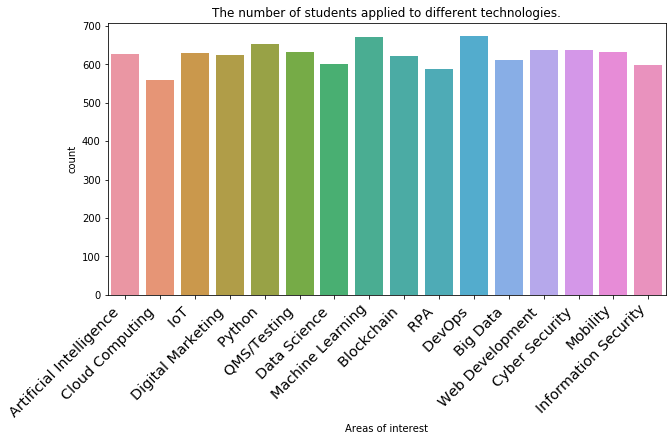

In [3]:
plt.figure(figsize=(10,5))
chart = sns.countplot(x = "Areas of interest", data = stdata)
plt.title("The number of students applied to different technologies.")
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

### The different ways students learned about this program. 

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

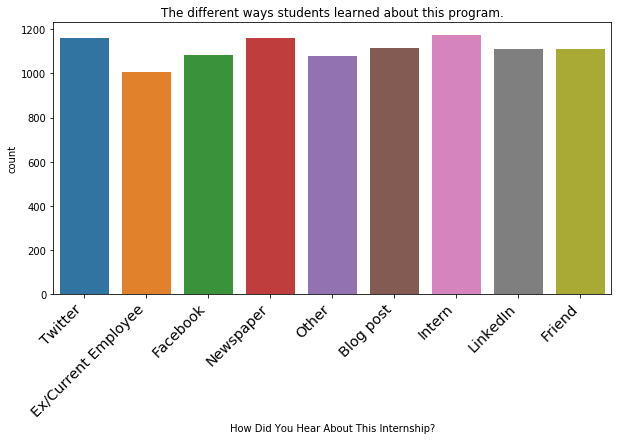

In [4]:
plt.figure(figsize=(10,5))
chart = sns.countplot(x = "How Did You Hear About This Internship?", data = stdata)
plt.title("The different ways students learned about this program.")
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

### Year-wise and area of study wise classification of students

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

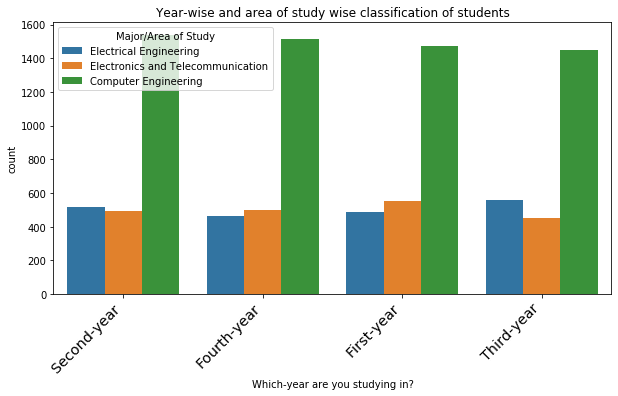

In [5]:
plt.figure(figsize=(10,5))
chart = sns.countplot(x = "Which-year are you studying in?", hue = "Major/Area of Study", data = stdata)
plt.title("Year-wise and area of study wise classification of students")
plt.xticks(
    rotation=45,
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

### City and college wise classification of students

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text xticklabel objects>)

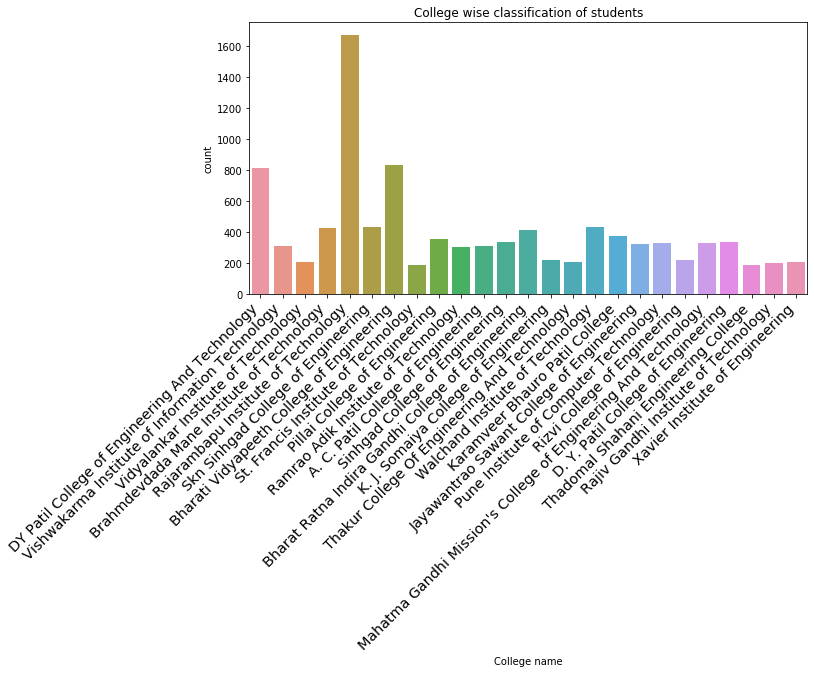

In [6]:
plt.figure(figsize=(10,5))
chart = sns.countplot(x = "College name",data = stdata)
chart.set_title('College wise classification of students')
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

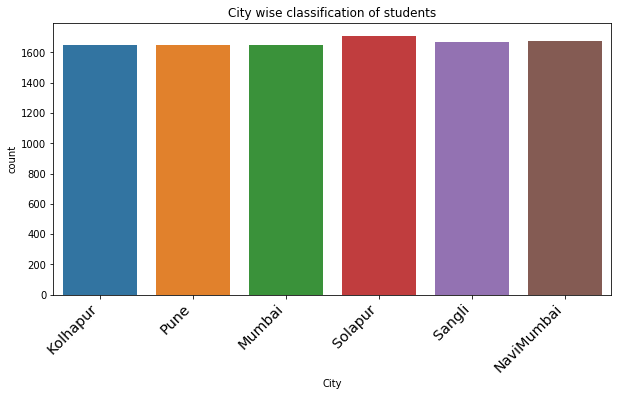

In [7]:
plt.figure(figsize=(10,5))
chart1 = sns.countplot(x = "City",data = stdata)
chart1.set_title('City wise classification of students')
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

In [8]:
ln = pd.get_dummies(stdata['Programming Language Known other than Java (one major)'],dtype = int, drop_first=True)

stdata = pd.concat([stdata,ln],axis = 1)

stdata.drop(['C','C#','C++','HTML/CSS','JavaScript','PHP'],axis=1,inplace=True)


### The number of students applied for Data Science who knew ‘’Python” and who didn’t

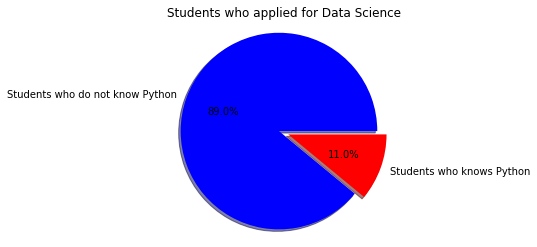

In [9]:
dt = stdata[stdata["Areas of interest"] == "Data Science "]
s = dt["Python"]


colors = ['blue', 'red']
explode = (0,0.1)
labels = ['Students who do not know Python', 
         'Students who knows Python']

sizes = [dt["Python"].value_counts()[0],
         dt["Python"].value_counts()[1]
        ]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode = explode, labels=labels, colors= colors, autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
ax1.set_title("Students who applied for Data Science")
plt.show()


### Students who are in the fourth year and have a CGPA greater than 8.0. 

In [10]:
yr = pd.get_dummies(stdata['Which-year are you studying in?'],dtype = int, drop_first=True)

stdata = pd.concat([stdata,yr],axis = 1)

stdata.drop(['Second-year','Third-year'],axis=1,inplace=True)




In [11]:

dt = stdata[stdata["Fourth-year"] == 1]
y1 = dt["Fourth-year"]
def rating_function(x):
    if x > 8.0:
        return "yes"
    else:
        return "No"
stdata["CGPA >8"] = stdata["CGPA/ percentage"].apply(rating_function)



(array([0]), <a list of 1 Text xticklabel objects>)

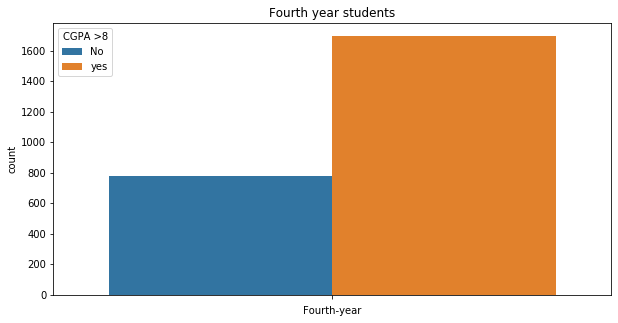

In [12]:


plt.figure(figsize=(10,5))
chart = sns.countplot(x = y1, hue ="CGPA >8", data = stdata)
chart.set_title('Fourth year students')
chart.set_xticklabels([''])
plt.xticks(
    rotation=0,
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

In [13]:
#Rate your verbal communication skills [1-10]
yr = pd.get_dummies(stdata['Areas of interest'],dtype = int, drop_first=True)

stdata = pd.concat([stdata,yr],axis = 1)

stdata.drop(['Cloud Computing ', 'IoT ','Python ', 'QMS/Testing ', 'Data Science ',
       'Machine Learning', 'Blockchain ', 'RPA ', 'DevOps ', 'Big Data ',
       'Web Development ', 'Cyber Security ', 'Mobility',
       'Information Security'],axis=1,inplace=True)



In [14]:
 def rating_function(x):
    if x > 8:
        return "yes"
    else:
        return "N"
stdata["written skills > 8"] = stdata["Rate your written communication skills [1-10]"].apply(rating_function)
stdata.head(10)
def rating_functions(x):
    if x > 8:
        return "yes"
    else:
        return "No"
stdata["verbal skills > 8"] = stdata["Rate your verbal communication skills [1-10]"].apply(rating_functions)
stdata['werbel and written skills'] = np.where(stdata['written skills > 8'] ==  stdata['verbal skills > 8'], 'yes', 'no')

### Students who applied for Digital Marketing with verbal and written communication score greater than 8

(array([0]), <a list of 1 Text xticklabel objects>)

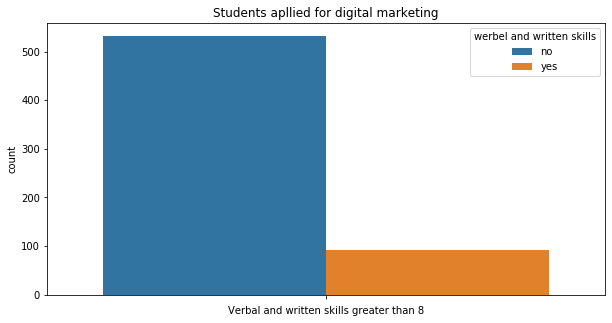

In [15]:
dt = stdata[stdata["Digital Marketing "] == 1]
chart.set_title('students applied for digital marketing')
y = dt["Digital Marketing "]

plt.figure(figsize=(10,5))
chart = sns.countplot(x = y, hue ="werbel and written skills", data = stdata)
chart.set_xticklabels([''])
chart.set_title('Students apllied for digital marketing')
chart.set_xlabel('Verbal and written skills greater than 8')
plt.xticks(
    rotation=0,
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

### Plot the relationship between the CGPA and the target variable.

0    ineligible
1      eligible
2    ineligible
3    ineligible
4    ineligible
Name: Label, dtype: object

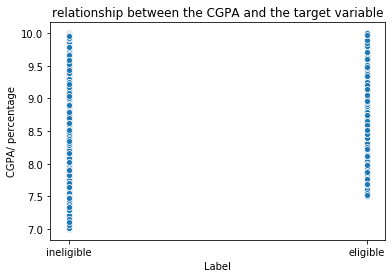

In [16]:
j = stdata.Label
relation = sns.scatterplot(x = j, y="CGPA/ percentage", data = stdata)
relation.set_title("relationship between the CGPA and the target variable")
j.head()

### Plot the relationship between the Area of Interest and the target variable.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 <a list of 16 Text xticklabel objects>)

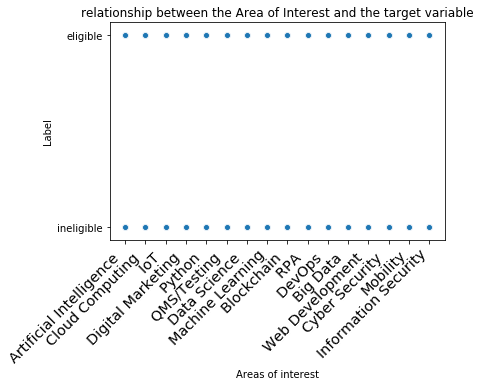

In [17]:
relation = sns.scatterplot(x = "Areas of interest", y=j, data = stdata)
relation.set_title("relationship between the Area of Interest and the target variable")
plt.xticks(
    rotation=45,
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

### Plot the relationship between the year of study, major, and the target variable

([0, 1, 2], <a list of 3 Text xticklabel objects>)

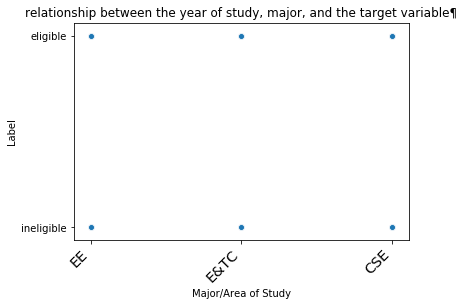

In [18]:
relation = sns.scatterplot(x = "Major/Area of Study", y=j, data = stdata)
relation.set_title("relationship between the year of study, major, and the target variable¶")
relation.set_xticklabels(['EE','E&TC','CSE'])
plt.xticks(
    rotation=45,
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)